### Imports and Definitions

In [8]:
import pandas as pd
from functions import *

In [19]:
def get_data(query):
    cur, cnx = connect_to_db('gender')
    cur.execute(query)
    df = pd.DataFrame(cur.fetchall())
    df.columns = [i[0] for i in cur.description]
    cnx.close()
    return df

### Running Queries

In [25]:
def get_attributes_query(attribute_1, attribute_table_1, attribute_2, attribute_table_2 = 'women_in_tech'):
    
    query1 = f'''SELECT a.country , a.{attribute_1[0]} as {attribute_1[1]},
                                    w.{attribute_2[0]} as {attribute_2[1]}
                FROM gender.{attribute_table_1} as a
                INNER JOIN gender.{attribute_table_2} as w ON w.country = a.country;'''
    return query1

In [31]:
query1 = get_attributes_query(('value', 'laws'), 'abortion_info',
                              ('percent_women_in_tech', 'percent_women_in_tech'))

In [32]:
df1 = get_data(query1)

In [37]:
query2 = get_attributes_query(('value', 'laws'), 'abortion_info',
                              ('percent_difference_of_women_in_workforce_and_women_in_tech', 'percent_difference_of_women_in_workforce_and_women_in_tech'))

In [38]:
df2 = get_data(query2)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# why can we use ols in this case?
anova_season = ols('cnt~season_cat',data=data).fit()
anova_season.summary()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_test1 = ols('cnt~test1_cat',data=df1).fit() 
anova_test1.summary()
anova_table1 = sm.stats.anova_lm(anova_test1, typ=2)
print(anova_table)
anova_test2 = ols('cnt~test2_cat',data=df2).fit() 
anova_test2.summary()
anova_table2 = sm.stats.anova_lm(anova_test2, typ=2)
print(anova_table2)

In [42]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_test1 = ols('percent_women_in_tech~laws',data=df1).fit() 
anova_test1.summary()
anova_table1 = sm.stats.anova_lm(anova_test1, typ=2)
print(anova_table1)

               sum_sq    df         F    PR(>F)
laws        40.785724   1.0  1.576165  0.216784
Residual  1009.185725  39.0       NaN       NaN


In [43]:
anova_test2 = ols('percent_difference_of_women_in_workforce_and_women_in_tech~laws',data=df2).fit() 
anova_test2.summary()
anova_table2 = sm.stats.anova_lm(anova_test2, typ=2)
print(anova_table2)

              sum_sq    df         F    PR(>F)
laws        0.099679   1.0  0.004581  0.946383
Residual  848.584243  39.0       NaN       NaN


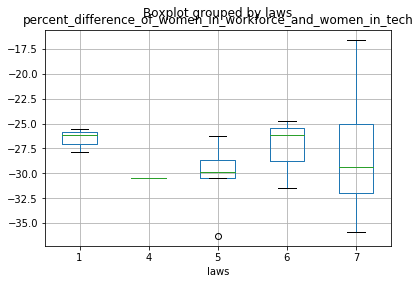

In [46]:
import matplotlib.pyplot as plt
df2.boxplot('percent_difference_of_women_in_workforce_and_women_in_tech', by='laws')

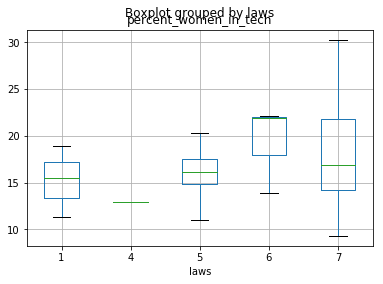

In [47]:
import matplotlib.pyplot as plt
df1.boxplot('percent_women_in_tech', by='laws')

In [49]:
df1['laws'] = df1['laws'].apply(lambda x: 1 if x > 5 else 0)

In [50]:
df2['laws'] = df2['laws'].apply(lambda x: 1 if x > 5 else 0)

In [51]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_test1 = ols('percent_women_in_tech~laws',data=df1).fit() 
anova_test1.summary()
anova_table1 = sm.stats.anova_lm(anova_test1, typ=2)
print(anova_table1)

              sum_sq    df         F    PR(>F)
laws       56.238057   1.0  2.207115  0.145415
Residual  993.733392  39.0       NaN       NaN


In [52]:
anova_test2 = ols('percent_difference_of_women_in_workforce_and_women_in_tech~laws',data=df2).fit() 
anova_test2.summary()
anova_table2 = sm.stats.anova_lm(anova_test2, typ=2)
print(anova_table2)

              sum_sq    df         F    PR(>F)
laws       14.961215   1.0  0.699858  0.407928
Residual  833.722707  39.0       NaN       NaN


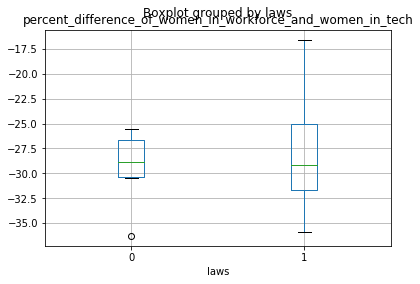

In [53]:
import matplotlib.pyplot as plt
df2.boxplot('percent_difference_of_women_in_workforce_and_women_in_tech', by='laws')

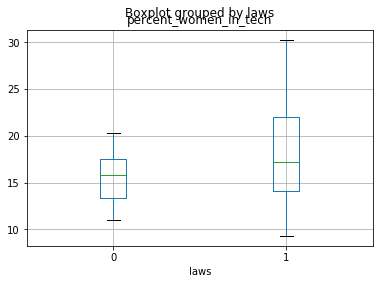

In [54]:
import matplotlib.pyplot as plt
df1.boxplot('percent_women_in_tech', by='laws')